In [3]:
#Import all required libraries as below

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [4]:
#import Skyserver data files using pandas

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Covid19_Daily_Report_US.csv")

In [5]:
#Checking not null values & data types for all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     int64  
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [6]:
#distribution of categorical feature
df.describe(include=['O'])

,Province_State,Country_Region,Last_Update,ISO3
count,58,58,58,58
unique,58,1,1,6
top,Kentucky,US,5/21/2020 2:32,USA
freq,1,58,58,53


It shows that Montana province in country US have highest covid19 cases. 

In [7]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800275,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424690,28.054438


In [8]:
df.head(2)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,5/21/2020 2:32,32.3182,-86.9023,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.43886
1,Alaska,US,5/21/2020 2:32,61.3707,-152.4044,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN


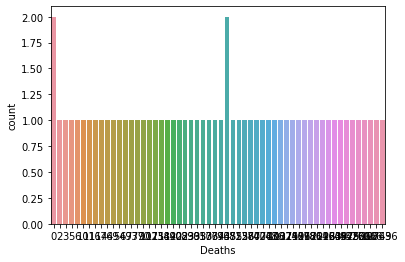

In [9]:
#Check Death count using count plot
sns.countplot(x='Deaths', data=df);

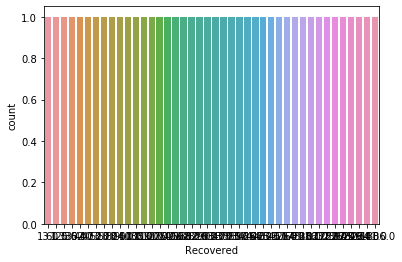

In [10]:
sns.countplot(x='Recovered', data=df);

Convert all columns data types into integer datatype using for loop -

In [11]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3','Testing_Rate','Hospitalization_Rate']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

Check datatype get converted into required one 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Province_State        58 non-null     int32
 1   Country_Region        58 non-null     int32
 2   Last_Update           58 non-null     int32
 3   Lat                   58 non-null     int64
 4   Long_                 58 non-null     int64
 5   Confirmed             58 non-null     int64
 6   Deaths                58 non-null     int64
 7   Recovered             58 non-null     int64
 8   Active                58 non-null     int64
 9   FIPS                  58 non-null     int64
 10  Incident_Rate         58 non-null     int64
 11  People_Tested         58 non-null     int64
 12  People_Hospitalized   58 non-null     int64
 13  Mortality_Rate        58 non-null     int64
 14  UID                   58 non-null     int64
 15  ISO3                  58 non-null     int32
 16  Testing_Ra

In [13]:
import numpy as np

df['Lat'].replace(np.NaN,df['Lat'].mean,inplace=True)
df['Long_'].replace(np.NaN,df['Long_'].mean,inplace=True)
df['Recovered'].replace(np.NaN,df['Recovered'].mean,inplace=True)
df['Incident_Rate'].replace(np.NaN,df['Incident_Rate'].mean,inplace=True)
df['People_Tested'].replace(np.NaN,df['People_Tested'].mean,inplace=True)
df['People_Hospitalized'].replace(np.NaN,df['People_Hospitalized'].mean,inplace=True)
df['Testing_Rate'].replace(np.NaN,df['Testing_Rate'].mean,inplace=True)
df['Hospitalization_Rate'].replace(np.NaN,df['Hospitalization_Rate'].mean,inplace=True)

In [14]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,9,28,32,31,57,40,0,29,32,16,22,5,4,25,11
1,1,0,0,55,2,6,5,4,5,1,4,9,38,9,6,4,42,42
2,2,0,0,0,0,0,0,46,0,51,0,0,41,57,0,0,1,35
3,3,0,0,12,9,35,36,23,36,2,21,33,18,37,7,4,4,12
4,4,0,0,15,22,19,16,24,16,3,15,21,8,6,8,4,22,9


# EDA - Analyse the data set stats using plots

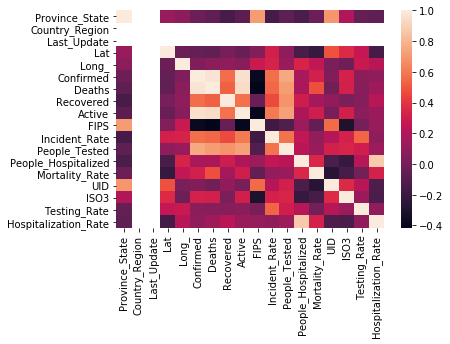

In [15]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

Above graph shows list of columns witrh correlation -> Province_State , Confirmed ,Recovered , Deaths , Active ,Incident_Rate , People_Tested

In [16]:
# Checking for skewness for each of the column
df.skew()

Province_State          0.000000
Country_Region          0.000000
Last_Update             0.000000
Lat                     0.000000
Long_                   0.000000
Confirmed               0.000000
Deaths                 -0.000447
Recovered               0.000000
Active                  0.000000
FIPS                    0.000000
Incident_Rate           0.000000
People_Tested           0.000000
People_Hospitalized     0.000000
Mortality_Rate          0.000000
UID                     0.000000
ISO3                   -4.126625
Testing_Rate            0.000000
Hospitalization_Rate    0.000000
dtype: float64

It shows no skewed data avaialbility

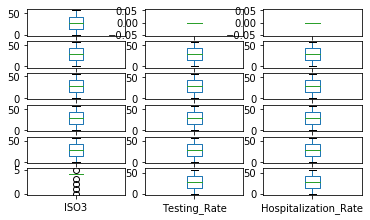

In [17]:
# Visualization - box and whisker plots - Univariate Analysis
df.plot(kind='box', subplots=True, layout=(7,3), sharex=False, sharey=False)
plt.show()

It shows ISO3 column have many outliers ,hence will drop this column from feature list

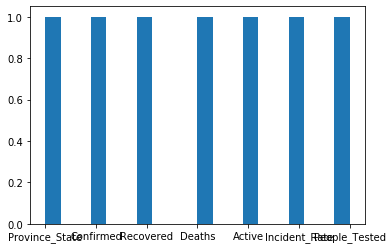

In [18]:
# Univariate Analysis
import matplotlib.pyplot as plt

x = ['Province_State','Confirmed' ,'Recovered','Deaths' ,'Active' ,'Incident_Rate' ,'People_Tested']
plt.hist(x, bins = 20)
plt.show()

All above input columns are equally impacted

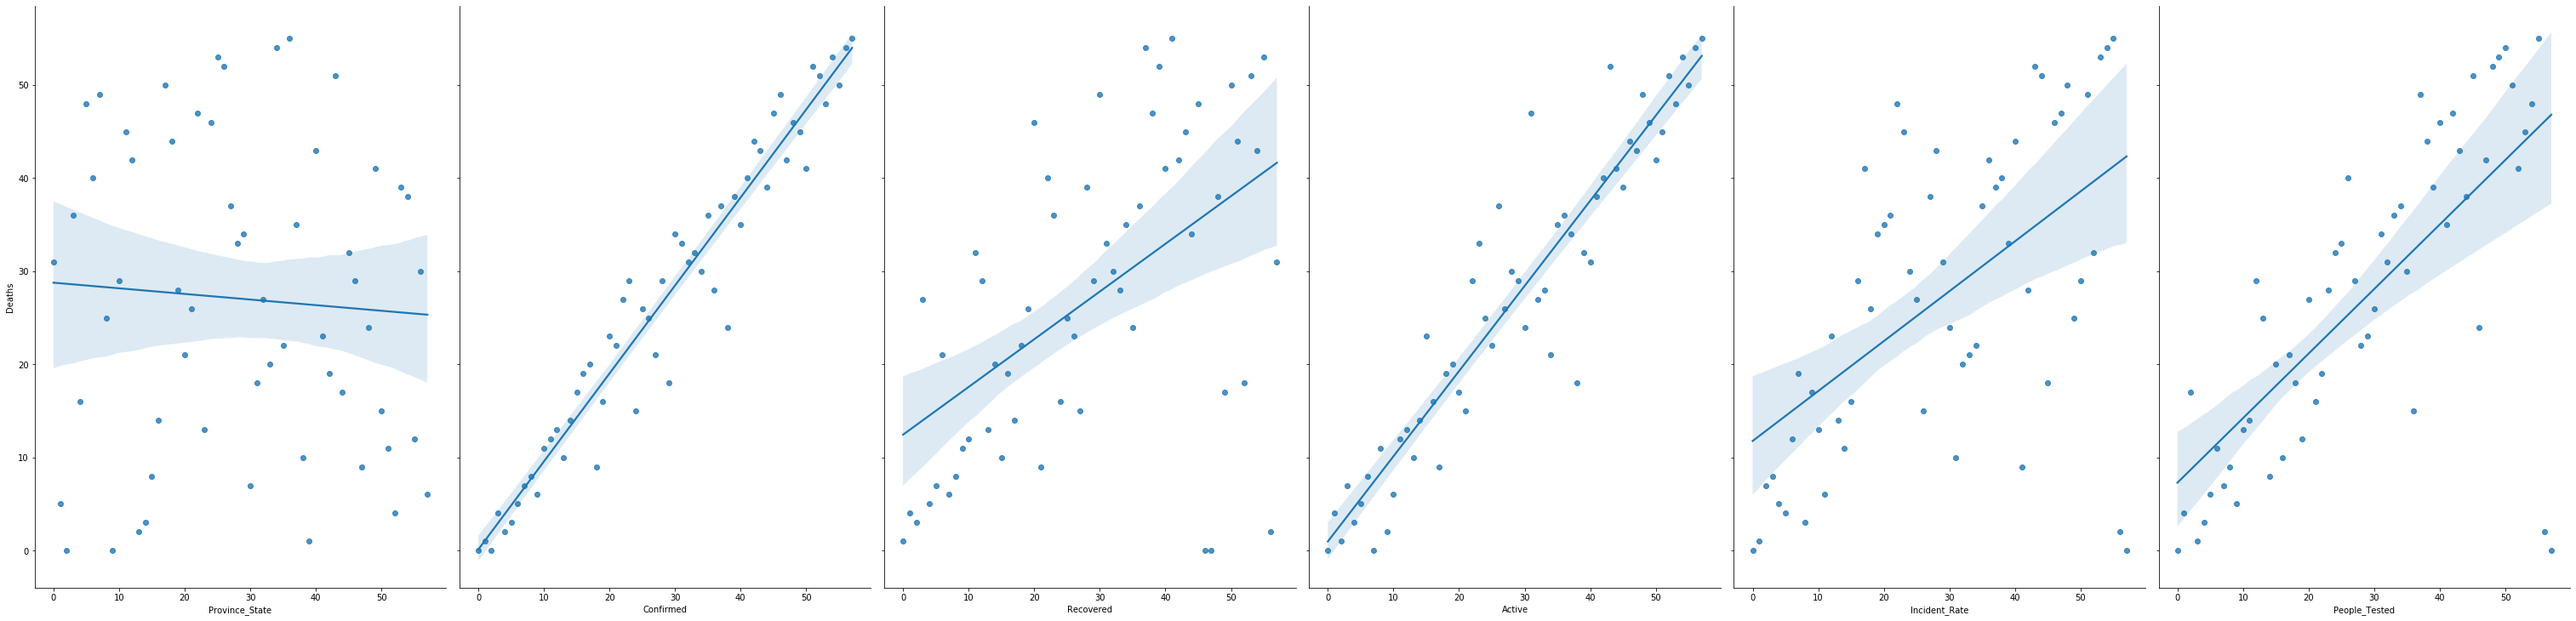

In [19]:
# draw Scatter plot for linear regression
# Column names hgaving strong relation - Cement , Superplasticizer , Age
sns.pairplot(df, x_vars=['Province_State','Confirmed' ,'Recovered','Active' ,'Incident_Rate' ,'People_Tested'], y_vars='Deaths', size=10, aspect=0.7, kind='reg')
plt.show()

This pairplot shows all feature values except 'Province_State' affect linearly positive,hence linear regression can be applied

# Preparing X  & Y for Regression model -

In [20]:
import pandas as pd
x = df[['Province_State','Confirmed' ,'Recovered','Active' ,'Incident_Rate' ,'People_Tested']]
y = df.Deaths        # y is a vector, hence we use dot to access 'label'

In [21]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(58, 6)


In [22]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(58,)


In [23]:
# Split data using train_test_split method

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 45,test_size=0.20)

In [24]:
# Interpreting model coefficients
# print the intercept and coefficients

# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)


1.656764472767101
[-5.25010384e-02  1.03259374e+00 -4.13507952e-02 -3.18549072e-02
 -1.43010833e-04 -1.58877293e-02]


In [25]:
# make predictions on the testing set
y_pred = linreg.predict(x_test)

In [26]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  4.166363455153166
Mean Sqr Error:    25.08466697127163
Root mean sqr error:  5.0084595407442025


In [27]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_rscore=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22)
    regrn = linear_model.LinearRegression()
    regrn.fit(x_train,y_train)
    y_pred = regrn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 88  is  0.9831655902885448


In [28]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.945268541947567
0.8421383729445804
0.5002109622742847


In [29]:
from sklearn.svm import SVR

svr = SVR(kernel = "linear")
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
print(pred_y)

0.945268541947567
[49.16729849 51.13013353 16.73804748 45.3648947  49.26686854 23.63751337
 12.85484656 20.35204837 39.51627033 26.17983843 31.35859343 39.28109342
 10.07558164]


In [34]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(x_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 92.17 %


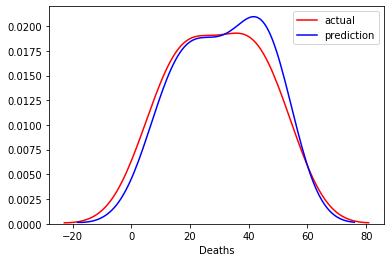

In [35]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-It shows that Montana province in country US have highest covid19 cases.
Linear Regression R2 score = 98 % & Test score is is 92 % ,this is best suited score for this model.
Visualisation of prediction graph shows that there is slite difference between ctual & prediction.
Death & Recovered cases are in linear relationship with positivity 